In [1]:
from matplotlib import pyplot as plt

from hamiltonians import *
from qaoa_solver import QAOASolver
from utils import *

# Basic usage

## Default problem Hamiltonian

In [2]:
solver = QAOASolver(N=21, p=3,
                    problem_hamiltonian_gen=default_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

In [3]:
best, results, monitoring = solver.run(iters=10)

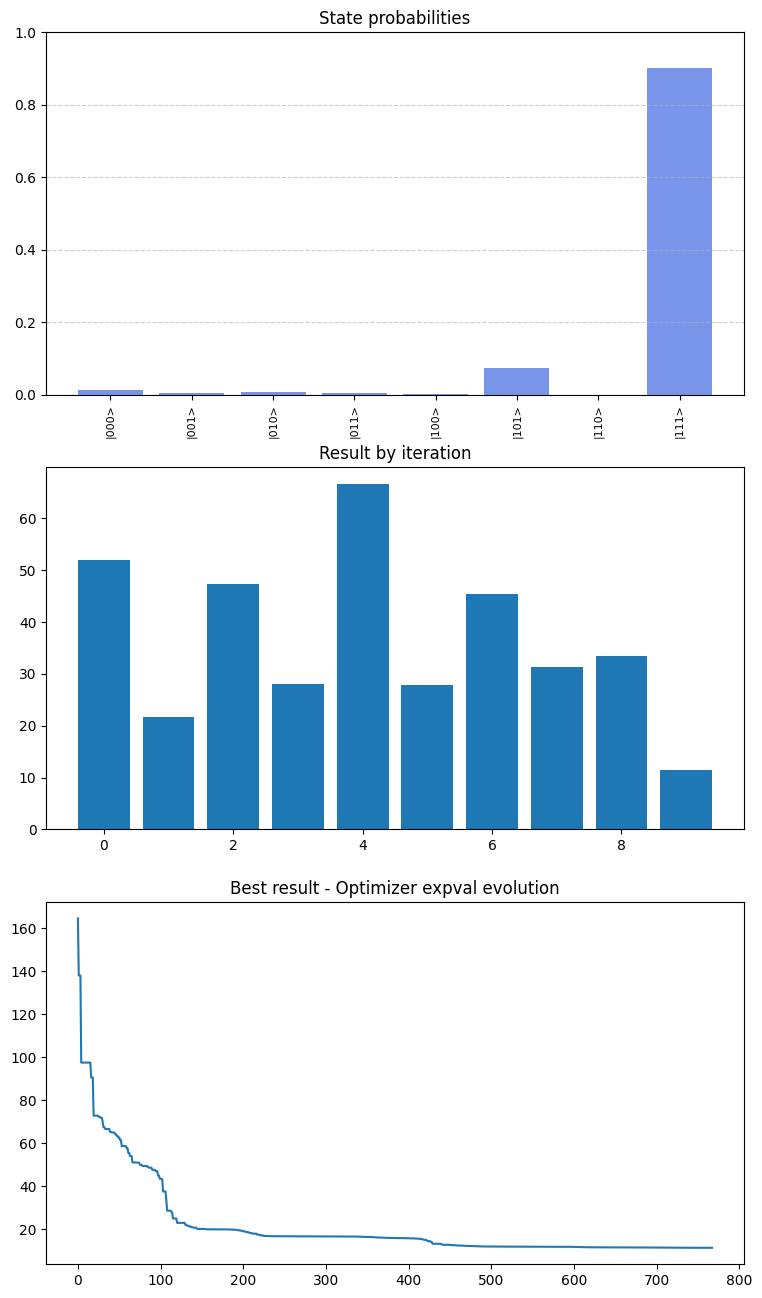

In [4]:
_, axs = plt.subplots(3, figsize=(9,16))
plot_quantum_state_probabilities(best['state'], axs[0])
axs[1].bar(range(10), [item['cost'] for item in results])
axs[1].title.set_text('Result by iteration')
axs[2].plot(monitoring[best['iter']]['cost_evol'])
axs[2].title.set_text('Best result - Optimizer expval evolution')

## Simplified problem Hamiltonian

In [20]:
solver = QAOASolver(N=21, p=3,
                    problem_hamiltonian_gen=simplified_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

In [21]:
best, results, monitoring = solver.run(iters=10)

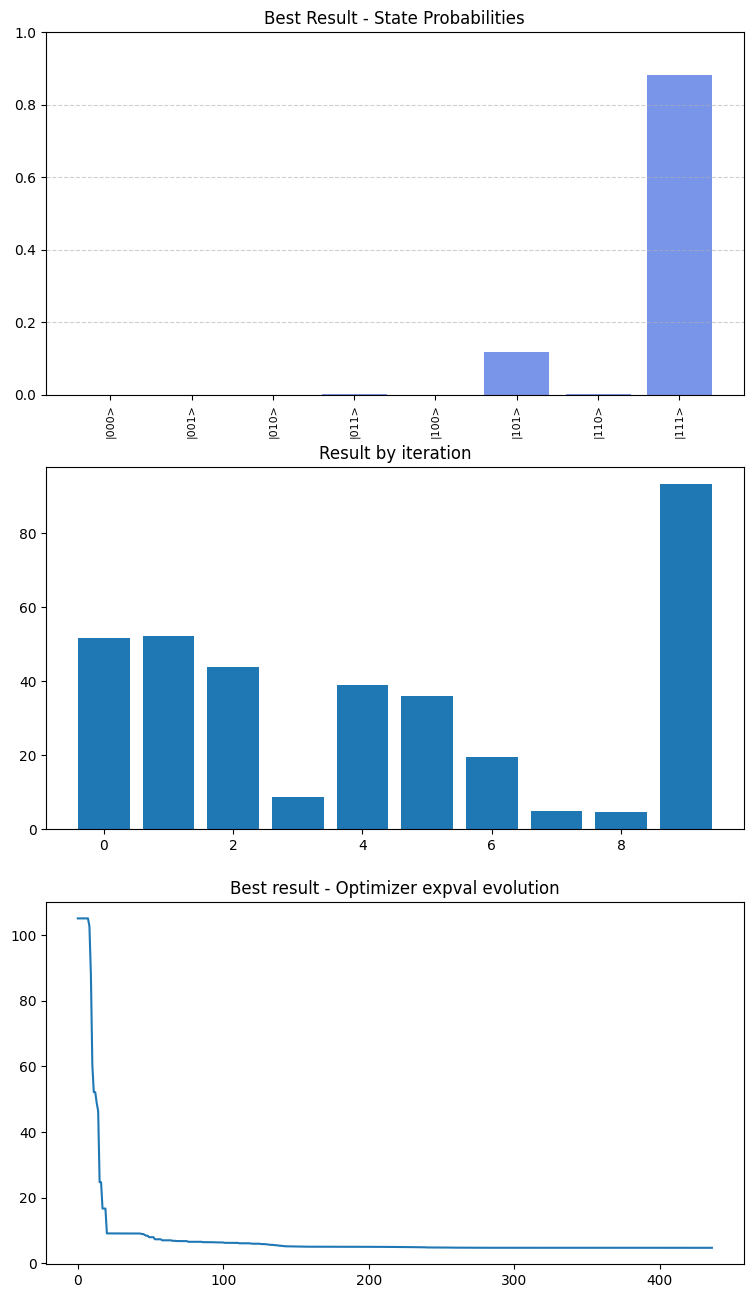

In [22]:
_, axs = plt.subplots(3, figsize=(9,16))
plot_quantum_state_probabilities(best['state'], axs[0])
axs[1].bar(range(10), [item['cost'] for item in results])
axs[1].title.set_text('Result by iteration')
axs[2].plot(monitoring[best['iter']]['cost_evol'])
axs[2].title.set_text('Best result - Optimizer expval evolution')

# Drawing circuits

## N=15, p=1, Hc=default

Hp: 90.0 * I([0, 1, 2]) + 36.0 * Z(0) + 20.0 * Z(1) + 40.0 * Z(2) + 2.0 * (Z(0) @ Z(1)) + 4.0 * (Z(0) @ Z(2)) + 20.0 * (Z(1) @ Z(2)) + -16.0 * (Z(0) @ Z(1) @ Z(2))
Hc: 90.0 * I([0, 1, 2]) + 36.0 * Z(0) + 20.0 * Z(1) + 40.0 * Z(2) + 2.0 * (Z(0) @ Z(1)) + 4.0 * (Z(0) @ Z(2)) + 20.0 * (Z(1) @ Z(2)) + -16.0 * (Z(0) @ Z(1) @ Z(2))
Hm: X(0) + X(1) + X(2)

Number of gates: 13
Gate sizes: {1: 9, 2: 3, 3: 1}


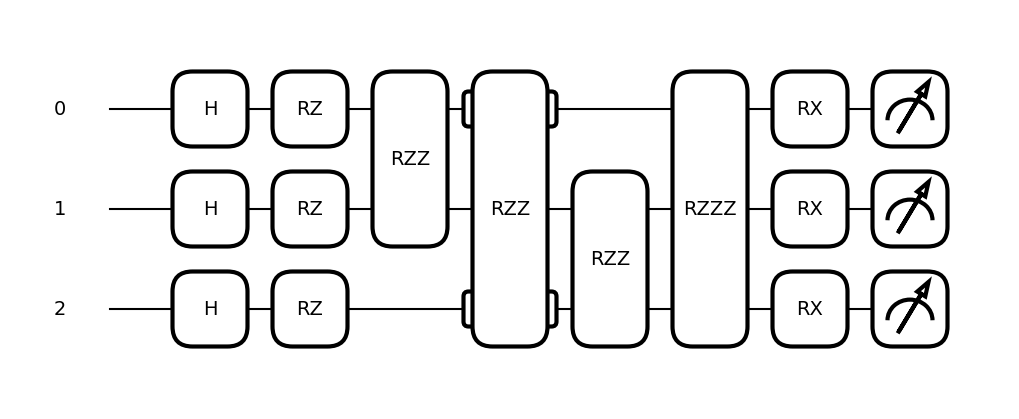

In [3]:
solver = QAOASolver(N=15, p=1,
                    problem_hamiltonian_gen=default_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')
print(f'Gate sizes: {solver.gate_sizes}')

solver.draw_circuit()

## N=15, p=1, Hp=simp

Hp: 7.0 * I([0, 1, 2]) + 4.0 * Z(0) + 2.0 * Z(1) + 4.0 * Z(2) + -1.0 * (Z(0) @ Z(1)) + -2.0 * (Z(0) @ Z(2))
Hc: 90.0 * I([0, 1, 2]) + 36.0 * Z(0) + 20.0 * Z(1) + 40.0 * Z(2) + 2.0 * (Z(0) @ Z(1)) + 4.0 * (Z(0) @ Z(2)) + 20.0 * (Z(1) @ Z(2)) + -16.0 * (Z(0) @ Z(1) @ Z(2))
Hm: X(0) + X(1) + X(2)

Number of gates: 11


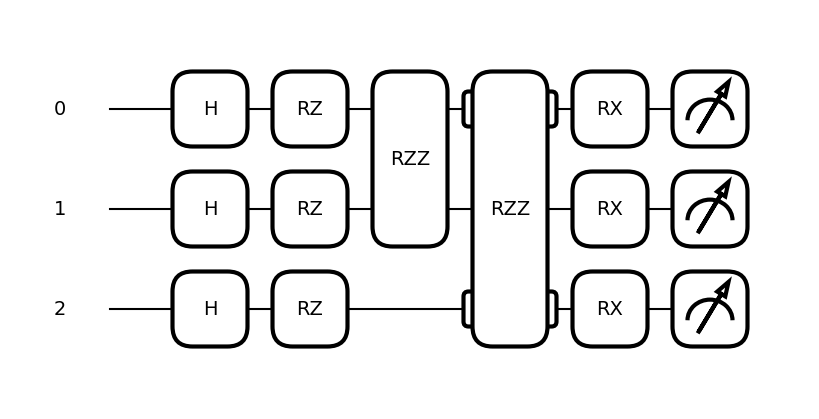

In [8]:
solver = QAOASolver(N=15, p=1,
                    problem_hamiltonian_gen=simplified_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')

solver.draw_circuit()

## N=15, p=1, Hp=simp, Hc=abs

Hp: 7.0 * I([0, 1, 2]) + 4.0 * Z(0) + 2.0 * Z(1) + 4.0 * Z(2) + -1.0 * (Z(0) @ Z(1)) + -2.0 * (Z(0) @ Z(2))
Hc: 8.5 * (I(0) @ I(1) @ I(2)) + 2.5 * (I(0) @ I(1) @ Z(2)) + 0.5 * (I(0) @ Z(1) @ I(2)) + 1.5 * (I(0) @ Z(1) @ Z(2)) + 2.5 * (Z(0) @ I(1) @ I(2)) + -0.5 * (Z(0) @ I(1) @ Z(2)) + 0.5 * (Z(0) @ Z(1) @ I(2)) + -1.5 * (Z(0) @ Z(1) @ Z(2))
Hm: X(0) + X(1) + X(2)

Number of gates: 11


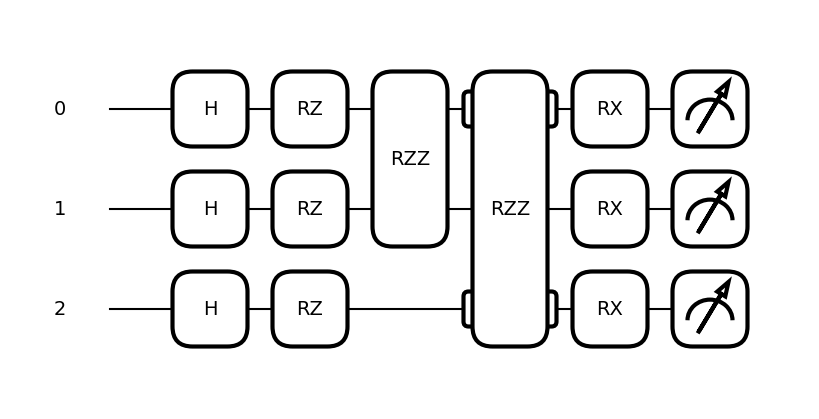

In [9]:
solver = QAOASolver(N=15, p=1,
                    problem_hamiltonian_gen=simplified_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=abs_cost_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')

solver.draw_circuit()

## N=35, p=1

Hp: 770.0 * I([0, 1, 2, 3, 4]) + -120.0 * Z(0) + -240.0 * Z(1) + -56.0 * Z(2) + -112.0 * Z(3) + -224.0 * Z(4) + 340.0 * (Z(0) @ Z(1)) + 58.0 * (Z(0) @ Z(2)) + 116.0 * (Z(0) @ Z(3)) + 232.0 * (Z(0) @ Z(4)) + 116.0 * (Z(1) @ Z(2)) + 232.0 * (Z(1) @ Z(3)) + 464.0 * (Z(1) @ Z(4)) + 84.0 * (Z(2) @ Z(3)) + 168.0 * (Z(2) @ Z(4)) + 336.0 * (Z(3) @ Z(4)) + -64.0 * (Z(0) @ Z(1) @ Z(2)) + -128.0 * (Z(0) @ Z(1) @ Z(3)) + -256.0 * (Z(0) @ Z(1) @ Z(4)) + -32.0 * (Z(0) @ Z(2) @ Z(3)) + -64.0 * (Z(0) @ Z(2) @ Z(4)) + -128.0 * (Z(0) @ Z(3) @ Z(4)) + -64.0 * (Z(1) @ Z(2) @ Z(3)) + -128.0 * (Z(1) @ Z(2) @ Z(4)) + -256.0 * (Z(1) @ Z(3) @ Z(4)) + 16.0 * (Z(0) @ Z(1) @ Z(2) @ Z(3)) + 32.0 * (Z(0) @ Z(1) @ Z(2) @ Z(4)) + 64.0 * (Z(0) @ Z(1) @ Z(3) @ Z(4))
Hc: 770.0 * I([0, 1, 2, 3, 4]) + -120.0 * Z(0) + -240.0 * Z(1) + -56.0 * Z(2) + -112.0 * Z(3) + -224.0 * Z(4) + 340.0 * (Z(0) @ Z(1)) + 58.0 * (Z(0) @ Z(2)) + 116.0 * (Z(0) @ Z(3)) + 232.0 * (Z(0) @ Z(4)) + 116.0 * (Z(1) @ Z(2)) + 232.0 * (Z(1) @ Z(3)) + 46

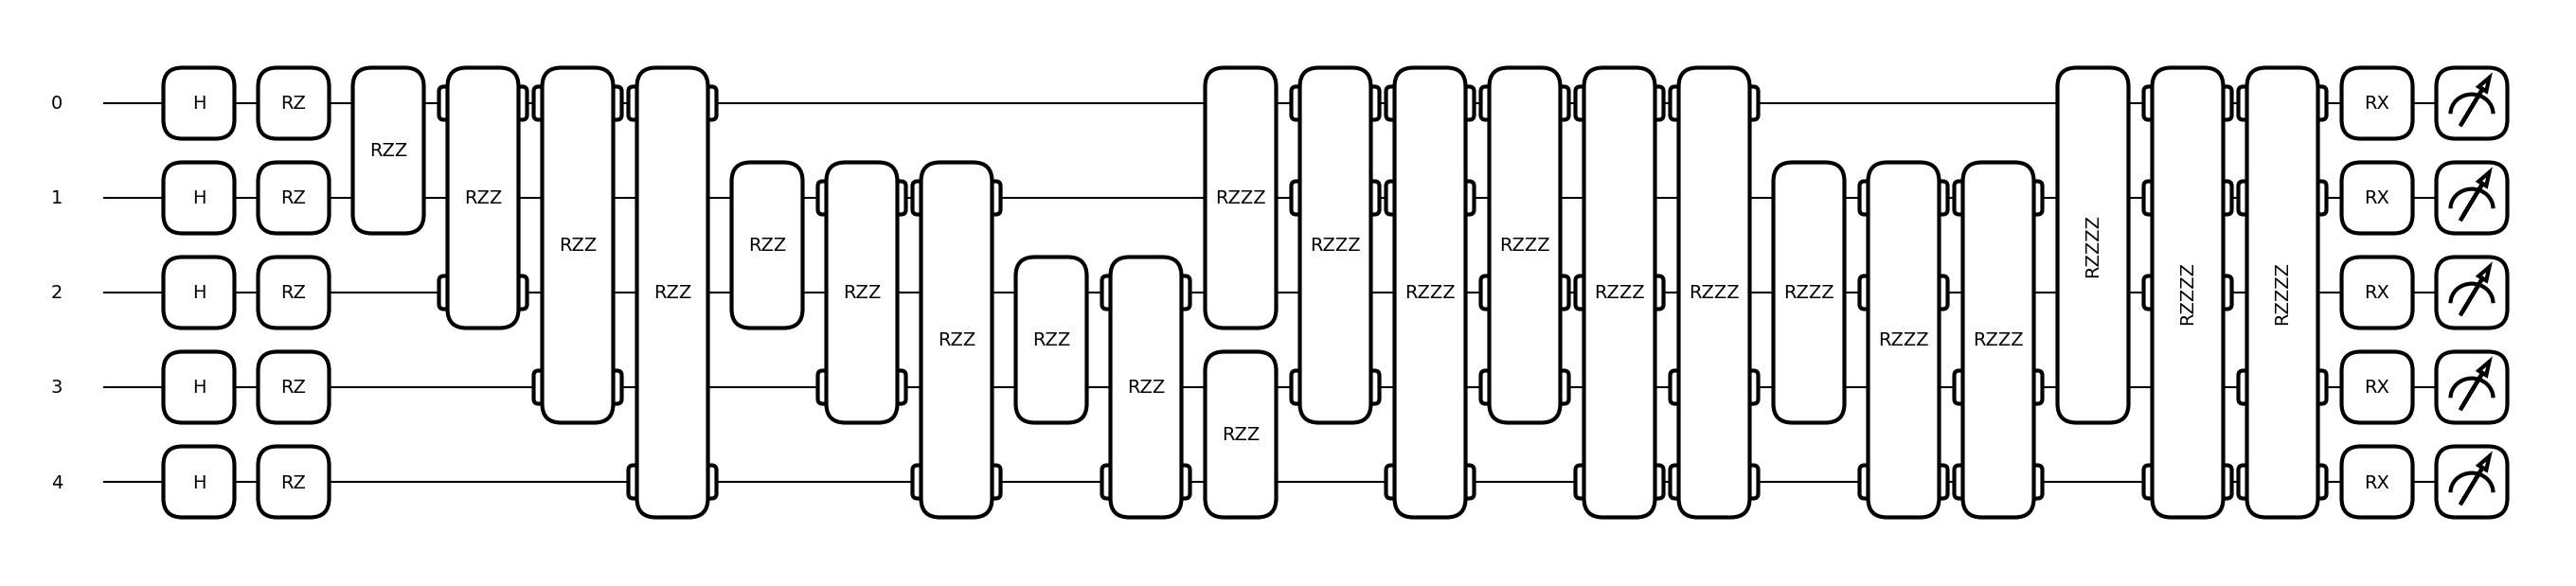

In [10]:
solver = QAOASolver(N=35, p=1,
                    problem_hamiltonian_gen=default_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')

solver.draw_circuit()

## N=35, p=1, Hp=simp, Hc=abs

Hp: 3.0 * I([0, 1, 2, 3, 4]) + 8.0 * Z(0) + 16.0 * Z(1) + 4.0 * Z(2) + 8.0 * Z(3) + 16.0 * Z(4) + -1.0 * (Z(0) @ Z(2)) + -2.0 * (Z(0) @ Z(3)) + -4.0 * (Z(0) @ Z(4)) + -2.0 * (Z(1) @ Z(2)) + -4.0 * (Z(1) @ Z(3)) + -8.0 * (Z(1) @ Z(4))
Hc: 23.25 * (I(0) @ I(1) @ I(2) @ I(3) @ I(4)) + -2.5 * (I(0) @ I(1) @ I(2) @ I(3) @ Z(4)) + 0.25 * (I(0) @ I(1) @ I(2) @ Z(3) @ I(4)) + 6.0 * (I(0) @ I(1) @ I(2) @ Z(3) @ Z(4)) + -0.25 * (I(0) @ I(1) @ Z(2) @ I(3) @ I(4)) + 2.5 * (I(0) @ I(1) @ Z(2) @ I(3) @ Z(4)) + 1.25 * (I(0) @ I(1) @ Z(2) @ Z(3) @ I(4)) + 0.5 * (I(0) @ I(1) @ Z(2) @ Z(3) @ Z(4)) + -2.5 * (I(0) @ Z(1) @ I(2) @ I(3) @ I(4)) + 8.75 * (I(0) @ Z(1) @ I(2) @ I(3) @ Z(4)) + 2.0 * (I(0) @ Z(1) @ I(2) @ Z(3) @ I(4)) + -4.25 * (I(0) @ Z(1) @ I(2) @ Z(3) @ Z(4)) + 1.5 * (I(0) @ Z(1) @ Z(2) @ I(3) @ I(4)) + -1.75 * (I(0) @ Z(1) @ Z(2) @ I(3) @ Z(4)) + -0.5 * (I(0) @ Z(1) @ Z(2) @ Z(3) @ I(4)) + -1.25 * (I(0) @ Z(1) @ Z(2) @ Z(3) @ Z(4)) + 0.25 * (Z(0) @ I(1) @ I(2) @ I(3) @ I(4)) + 2.0 * (Z(0) @ 

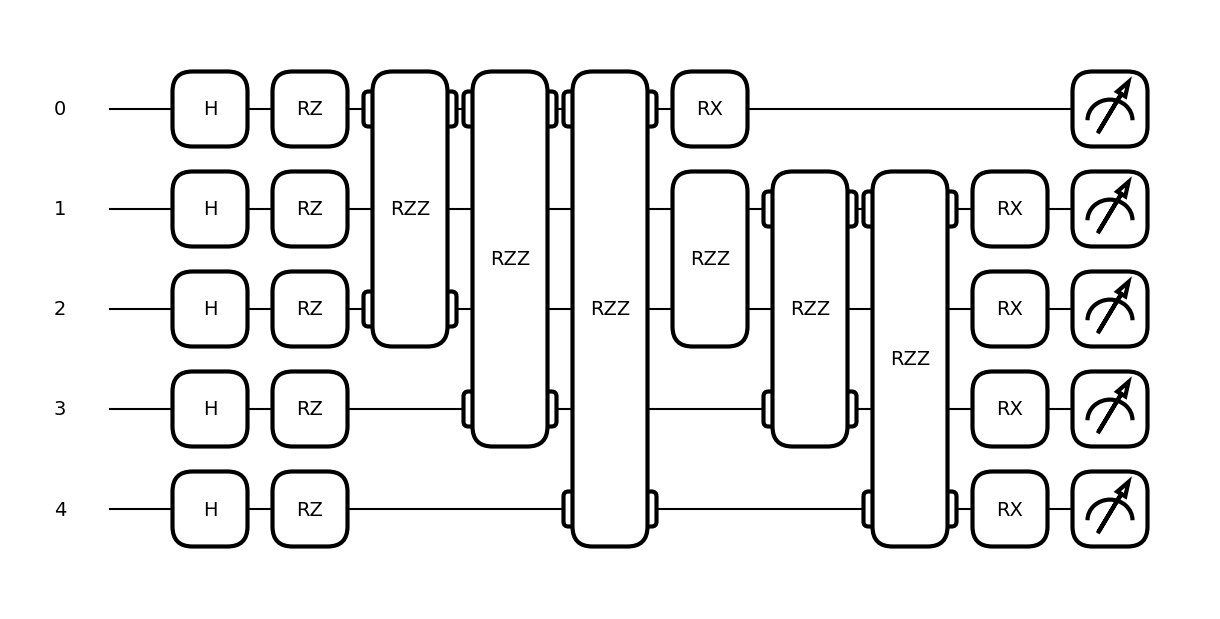

In [11]:
solver = QAOASolver(N=35, p=1,
                    problem_hamiltonian_gen=simplified_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=abs_cost_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')

solver.draw_circuit()

## N=35, p=6, Hp=simp

Hp: 3.0 * I([0, 1, 2, 3, 4]) + 8.0 * Z(0) + 16.0 * Z(1) + 4.0 * Z(2) + 8.0 * Z(3) + 16.0 * Z(4) + -1.0 * (Z(0) @ Z(2)) + -2.0 * (Z(0) @ Z(3)) + -4.0 * (Z(0) @ Z(4)) + -2.0 * (Z(1) @ Z(2)) + -4.0 * (Z(1) @ Z(3)) + -8.0 * (Z(1) @ Z(4))
Hc: 770.0 * I([0, 1, 2, 3, 4]) + -120.0 * Z(0) + -240.0 * Z(1) + -56.0 * Z(2) + -112.0 * Z(3) + -224.0 * Z(4) + 340.0 * (Z(0) @ Z(1)) + 58.0 * (Z(0) @ Z(2)) + 116.0 * (Z(0) @ Z(3)) + 232.0 * (Z(0) @ Z(4)) + 116.0 * (Z(1) @ Z(2)) + 232.0 * (Z(1) @ Z(3)) + 464.0 * (Z(1) @ Z(4)) + 84.0 * (Z(2) @ Z(3)) + 168.0 * (Z(2) @ Z(4)) + 336.0 * (Z(3) @ Z(4)) + -64.0 * (Z(0) @ Z(1) @ Z(2)) + -128.0 * (Z(0) @ Z(1) @ Z(3)) + -256.0 * (Z(0) @ Z(1) @ Z(4)) + -32.0 * (Z(0) @ Z(2) @ Z(3)) + -64.0 * (Z(0) @ Z(2) @ Z(4)) + -128.0 * (Z(0) @ Z(3) @ Z(4)) + -64.0 * (Z(1) @ Z(2) @ Z(3)) + -128.0 * (Z(1) @ Z(2) @ Z(4)) + -256.0 * (Z(1) @ Z(3) @ Z(4)) + 16.0 * (Z(0) @ Z(1) @ Z(2) @ Z(3)) + 32.0 * (Z(0) @ Z(1) @ Z(2) @ Z(4)) + 64.0 * (Z(0) @ Z(1) @ Z(3) @ Z(4))
Hm: X(0) + X(1) + X(2) 

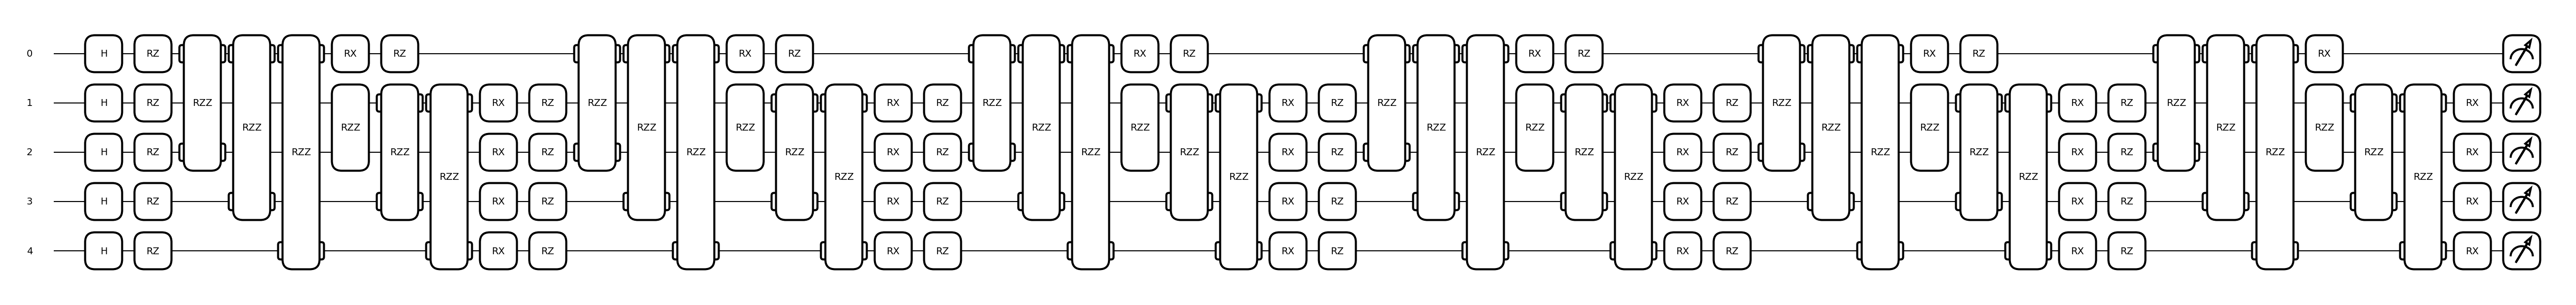

In [12]:
solver = QAOASolver(N=35, p=6,
                    problem_hamiltonian_gen=simplified_problem_H,
                    mixer_hamiltonian_gen=default_mixer_H,
                    cost_hamiltonian_gen=default_problem_H)

print(f'Hp: {solver.Hp}')
print(f'Hc: {solver.Hc}')
print(f'Hm: {solver.Hm}')
print(f'\nNumber of gates: {solver.num_gates}')

solver.draw_circuit()